In [1]:
from aemeasure import read_as_pd
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()
from _utils import quick_plot_setup

quick_plot_setup(use_tex=False)

In [2]:
from pcpptc import PolygonInstance, Solution
from pcpptc.plot import setup_plot, plot_polygon_instance, plot_solution
from pcpptc.plot.polgyon_instance import plot_coverage

In [3]:
read_as_pd("./solutions_04/1.results.json").columns

Loaded dataframe ./solutions_04/1.results.json
Executed on: ['algry03']
During: 2021-08-25 15:32:11.115218 and 2021-08-25 15:48:45.011178


Index(['solution', 'coverage', 'touring_cost', 'length', 'integralization',
       'turn_sum', 'instance', 'instance_path', 'runtime', 'timestamp',
       'hostname', 'argv', 'git_revision', 'cwd', 'solver', 'i',
       'turn_factor'],
      dtype='object')

In [4]:
tables = []
for f in os.listdir("./solutions_04"):
    if not f.endswith(".results.json"):
        continue
    f = os.path.join("./solutions_04", f)
    tables.append(read_as_pd(f))

data = pd.concat(tables, ignore_index=True)
data.groupby(["solver"])["instance"].nunique()

Loaded dataframe ./solutions_04/75.results.json
Executed on: ['algry01']
During: 2021-08-25 15:07:28.892179 and 2021-08-25 15:13:25.565169
Loaded dataframe ./solutions_04/156.results.json
Executed on: ['algry01']
During: 2021-08-25 13:34:46.453411 and 2021-08-25 13:38:35.889058
Loaded dataframe ./solutions_04/119.results.json
Executed on: ['algry03']
During: 2021-08-25 10:48:17.929488 and 2021-08-25 11:05:28.570785
Loaded dataframe ./solutions_04/173.results.json
Executed on: ['algry03']
During: 2021-08-25 13:59:23.152691 and 2021-08-25 14:12:27.384525
Loaded dataframe ./solutions_04/144.results.json
Executed on: ['algry03']
During: 2021-08-25 08:40:47.448984 and 2021-08-25 08:43:32.532389
Loaded dataframe ./solutions_04/185.results.json
Executed on: ['algry03']
During: 2021-08-25 09:50:20.594205 and 2021-08-25 09:58:22.789805
Loaded dataframe ./solutions_04/154.results.json
Executed on: ['algry03']
During: 2021-08-25 15:42:56.038332 and 2021-08-25 15:54:59.148520
Loaded dataframe ./so

solver
MeshAlgorithm(0.95, full_coverage=False, GridSolver(GridSolverParameter(k=3, r=2, adaptive=True, integralize=0, cc_opt_steps=0, cc_opt_size=50, t_opt_steps=0, t_opt_size=50)))      200
MeshAlgorithm(0.95, full_coverage=False, GridSolver(GridSolverParameter(k=3, r=2, adaptive=True, integralize=10, cc_opt_steps=0, cc_opt_size=50, t_opt_steps=0, t_opt_size=50)))     200
MeshAlgorithm(0.95, full_coverage=False, GridSolver(GridSolverParameter(k=3, r=2, adaptive=True, integralize=100, cc_opt_steps=0, cc_opt_size=50, t_opt_steps=0, t_opt_size=50)))    200
MeshAlgorithm(0.95, full_coverage=False, GridSolver(GridSolverParameter(k=3, r=2, adaptive=True, integralize=200, cc_opt_steps=0, cc_opt_size=50, t_opt_steps=0, t_opt_size=50)))    200
MeshAlgorithm(0.95, full_coverage=False, GridSolver(GridSolverParameter(k=3, r=2, adaptive=True, integralize=25, cc_opt_steps=0, cc_opt_size=50, t_opt_steps=0, t_opt_size=50)))     200
MeshAlgorithm(0.95, full_coverage=False, GridSolver(GridSolverParame

In [5]:
data[data.isna().any(axis=1)]

,solution,coverage,touring_cost,length,integralization,turn_sum,instance,instance_path,runtime,timestamp,hostname,argv,git_revision,cwd,solver,i,turn_factor


In [6]:
data.dropna(inplace=True)
data.drop_duplicates(subset=["instance", "solver"], inplace=True)
data.groupby(["solver"])["instance"].nunique()

solver
MeshAlgorithm(0.95, full_coverage=False, GridSolver(GridSolverParameter(k=3, r=2, adaptive=True, integralize=0, cc_opt_steps=0, cc_opt_size=50, t_opt_steps=0, t_opt_size=50)))      200
MeshAlgorithm(0.95, full_coverage=False, GridSolver(GridSolverParameter(k=3, r=2, adaptive=True, integralize=10, cc_opt_steps=0, cc_opt_size=50, t_opt_steps=0, t_opt_size=50)))     200
MeshAlgorithm(0.95, full_coverage=False, GridSolver(GridSolverParameter(k=3, r=2, adaptive=True, integralize=100, cc_opt_steps=0, cc_opt_size=50, t_opt_steps=0, t_opt_size=50)))    200
MeshAlgorithm(0.95, full_coverage=False, GridSolver(GridSolverParameter(k=3, r=2, adaptive=True, integralize=200, cc_opt_steps=0, cc_opt_size=50, t_opt_steps=0, t_opt_size=50)))    200
MeshAlgorithm(0.95, full_coverage=False, GridSolver(GridSolverParameter(k=3, r=2, adaptive=True, integralize=25, cc_opt_steps=0, cc_opt_size=50, t_opt_steps=0, t_opt_size=50)))     200
MeshAlgorithm(0.95, full_coverage=False, GridSolver(GridSolverParame

In [7]:
from pcpptc.instance_converter.dmsh import GmshGrid


def rename(s):
    names = {
        "RotatingHexagonalAlgorithm(RotatingRegularHexagonal(full_coverage=False, point_based=False, with_boundary=False))": "Regular (Partial)",
        "RotatingHexagonalAlgorithm(RotatingRegularHexagonal(full_coverage=True, point_based=False, with_boundary=False))": "Regular (Full)",
        "RotatingHexagonalAlgorithm(RotatingRegularHexagonal(full_coverage=True, point_based=True, with_boundary=False))": "Regular (Full, PB)",
        "MeshAlgorithm(0.95, full_coverage=False)": "Mesh (Partial)",
        "MeshAlgorithm(0.95, full_coverage=True)": "Mesh (Full)",
    }
    return names.get(s, s)


data["solver"] = data["solver"].apply(rename)

In [8]:
data["type"] = data["solver"].apply(lambda s: "hex" if "Hex" in s else "square")
data["point_based"] = data["solver"].apply(lambda s: "pb=True" in s)

In [9]:
instance_paths = list(data["instance_path"].unique())
instances = {f: PolygonInstance.from_json(file_path=f) for f in instance_paths}
instance_areas = pd.DataFrame(
    data={"area": [i.original_area.area for i in instances.values()]},
    index=instance_paths,
)
data = data.merge(instance_areas, left_on="instance_path", right_index=True)


def compute_objective(row):
    instance = instances[row["instance_path"]]
    solution = Solution.from_json(data=row["solution"])
    instance: PolygonInstance
    return instance.compute_touring_cost(
        solution.waypoints
    ) + instance.compute_missed_covering_value(solution.waypoints)


data["Obj"] = data.apply(compute_objective, axis=1)

In [10]:
t_ = data.groupby("instance")[["touring_cost"]].min()
data = data.merge(t_, left_on="instance", right_index=True, suffixes=("", "_min"))
data["relative_cost"] = 100 * ((data["touring_cost"] / data["touring_cost_min"]) - 1)
data["relative_coverage"] = 100 * data["coverage"] / data["area"]
data["type"] = data["solver"].apply(lambda s: s[0])

In [11]:
t_ = data.groupby("instance")[["Obj"]].min()
data = data.merge(t_, left_on="instance", right_index=True, suffixes=("", "_min"))
data["relative_obj"] = 100 * ((data["Obj"] / data["Obj_min"]) - 1)

In [12]:
data.sort_values(["solver"], inplace=True, ascending=True)
data.sort_values(["type"], inplace=True, ascending=True, kind="stable")

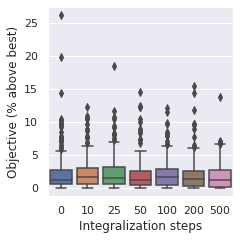

In [25]:
# data = data[data["relative_cost"]<=1000]

plt.figure(figsize=(3.5, 3.5))
sns.boxplot(data=data, x="integralization", y="relative_obj", orient="v")
plt.ylabel("Objective (% above best)")
plt.xlabel("Integralization steps")
plt.tight_layout()
plt.savefig("05_obj_integralizatio_steps.pdf")
plt.show()

In [24]:
data.groupby(["integralization"])[
    ["relative_obj", "relative_cost", "relative_coverage"]
].mean()

,relative_obj,relative_cost,relative_coverage
integralization,,,
0,2.345005,4.506922,66.369099
10,2.159023,4.319552,66.410327
25,2.296709,4.429663,66.417516
50,1.906367,3.769903,66.402601
100,2.089756,4.224425,66.449603
200,1.848726,3.732684,66.437465
500,1.747480,3.568879,66.520314


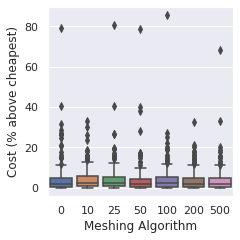

In [15]:
# data = data[data["relative_cost"]<=1000]

plt.figure(figsize=(3.5, 3.5))
sns.boxplot(data=data, x="integralization", y="relative_cost", orient="v")
plt.ylabel("Cost (% above cheapest)")
plt.xlabel("Meshing Algorithm")
plt.tight_layout()
plt.show()

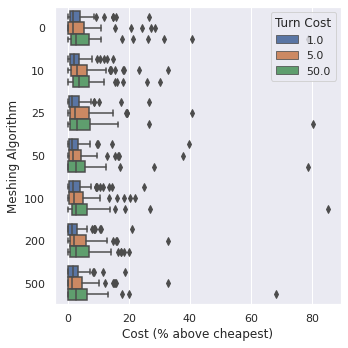

In [16]:
plt.figure(figsize=(5, 5))
sns.boxplot(
    data=data, y="integralization", x="relative_cost", orient="h", hue="turn_factor"
)
plt.xlabel("Cost (% above cheapest)")
plt.ylabel("Meshing Algorithm")
plt.legend(title="Turn Cost")
plt.tight_layout()
plt.show()

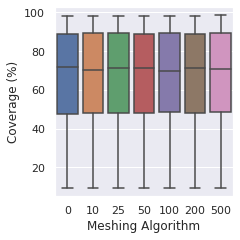

In [17]:
plt.figure(figsize=(3.5, 3.5))
sns.boxplot(data=data, x="integralization", y="relative_coverage", orient="v")
plt.ylabel("Coverage (%)")
plt.xlabel("Meshing Algorithm")

plt.tight_layout()
plt.show()

In [18]:
t_ = data.dropna()
t_ = t_.groupby(["solver"])["instance"].nunique()
t_

solver
MeshAlgorithm(0.95, full_coverage=False, GridSolver(GridSolverParameter(k=3, r=2, adaptive=True, integralize=0, cc_opt_steps=0, cc_opt_size=50, t_opt_steps=0, t_opt_size=50)))      200
MeshAlgorithm(0.95, full_coverage=False, GridSolver(GridSolverParameter(k=3, r=2, adaptive=True, integralize=10, cc_opt_steps=0, cc_opt_size=50, t_opt_steps=0, t_opt_size=50)))     200
MeshAlgorithm(0.95, full_coverage=False, GridSolver(GridSolverParameter(k=3, r=2, adaptive=True, integralize=100, cc_opt_steps=0, cc_opt_size=50, t_opt_steps=0, t_opt_size=50)))    200
MeshAlgorithm(0.95, full_coverage=False, GridSolver(GridSolverParameter(k=3, r=2, adaptive=True, integralize=200, cc_opt_steps=0, cc_opt_size=50, t_opt_steps=0, t_opt_size=50)))    200
MeshAlgorithm(0.95, full_coverage=False, GridSolver(GridSolverParameter(k=3, r=2, adaptive=True, integralize=25, cc_opt_steps=0, cc_opt_size=50, t_opt_steps=0, t_opt_size=50)))     200
MeshAlgorithm(0.95, full_coverage=False, GridSolver(GridSolverParame

In [19]:
t = data.groupby(["solver"])["runtime"].mean().reset_index()
t["solver"] = t["solver"].apply(lambda s: s.replace("□", "$\\square$"))
t["solver"] = t["solver"].apply(lambda s: s.replace("△", "$\\Delta$"))
t["solver"] = t["solver"].apply(lambda s: s.replace("%", "\\%"))
for i, t in t.iterrows():
    print(t["solver"], "&", round(t["runtime"], 1), "\\\\")

MeshAlgorithm(0.95, full_coverage=False, GridSolver(GridSolverParameter(k=3, r=2, adaptive=True, integralize=0, cc_opt_steps=0, cc_opt_size=50, t_opt_steps=0, t_opt_size=50))) & 60.1 \\
MeshAlgorithm(0.95, full_coverage=False, GridSolver(GridSolverParameter(k=3, r=2, adaptive=True, integralize=10, cc_opt_steps=0, cc_opt_size=50, t_opt_steps=0, t_opt_size=50))) & 63.1 \\
MeshAlgorithm(0.95, full_coverage=False, GridSolver(GridSolverParameter(k=3, r=2, adaptive=True, integralize=100, cc_opt_steps=0, cc_opt_size=50, t_opt_steps=0, t_opt_size=50))) & 92.1 \\
MeshAlgorithm(0.95, full_coverage=False, GridSolver(GridSolverParameter(k=3, r=2, adaptive=True, integralize=200, cc_opt_steps=0, cc_opt_size=50, t_opt_steps=0, t_opt_size=50))) & 124.5 \\
MeshAlgorithm(0.95, full_coverage=False, GridSolver(GridSolverParameter(k=3, r=2, adaptive=True, integralize=25, cc_opt_steps=0, cc_opt_size=50, t_opt_steps=0, t_opt_size=50))) & 67.4 \\
MeshAlgorithm(0.95, full_coverage=False, GridSolver(GridSolverP

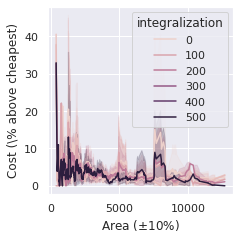

In [20]:
from _utils import convert_to_percentage_interval

t = convert_to_percentage_interval(
    table=data[
        [
            "area",
            "relative_cost",
            "solver",
            "instance",
            "relative_coverage",
            "integralization",
            "relative_obj",
        ]
    ],
    on_column="area",
    percentage=5,
)
plt.figure(figsize=(3.5, 3.5))
sns.lineplot(data=t, x="area", y="relative_cost", hue="integralization")
plt.ylabel("Cost (\% above cheapest)")
plt.xlabel("Area ($\pm 10\%$)")
plt.tight_layout()
plt.show()

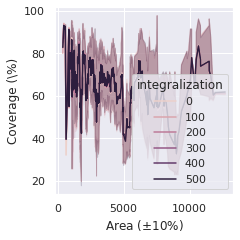

In [21]:
plt.figure(figsize=(3.5, 3.5))
sns.lineplot(data=t, x="area", y="relative_coverage", hue="integralization")
plt.ylabel("Coverage (\%)")
plt.xlabel("Area ($\pm 10\%$)")
plt.tight_layout()
plt.show()

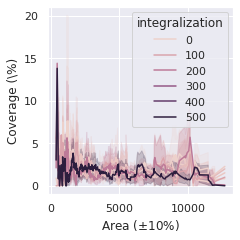

In [22]:
plt.figure(figsize=(3.5, 3.5))
sns.lineplot(data=t, x="area", y="relative_obj", hue="integralization")
plt.ylabel("Coverage (\%)")
plt.xlabel("Area ($\pm 10\%$)")
plt.tight_layout()
plt.show()